Health & Wellness Data Analysis

This project explores the relationship between lifestyle habits (e.g., smoking, exercise, sleep) and health outcomes (e.g., stress, BMI, chronic disease). Using a synthetic dataset which aims to uncover patterns and provide recommendations for better health.


1. Data Loading and initial Exploration

 Importing necessary libraries and loading the dataset to understand its structure, features, and data types. This helps in identifying the type of variables we are working with (categorical, numerical, etc.).


In [38]:

# Import necessary libraries
import pandas as pd

# Load the dataset
df = pd.read_csv('../Portfolio_Projects/synthetic_health_lifestyle_dataset.csv') # TODO: Lod the dataset

# Display the first few rows of the dataframe
print (df.head())


   ID  Age  Gender  Height_cm  Weight_kg   BMI Smoker   Exercise_Freq  \
0   1   56   Other      177.6       37.3  11.8    Yes             NaN   
1   2   69   Other      169.3       70.7  24.7     No  1-2 times/week   
2   3   46  Female      159.1       69.0  27.3     No           Daily   
3   4   32    Male      170.6       76.4  26.3     No  3-5 times/week   
4   5   60    Male      158.4       60.4  24.1     No  3-5 times/week   

  Diet_Quality Alcohol_Consumption Chronic_Disease  Stress_Level  Sleep_Hours  
0         Poor                 NaN              No             9          8.5  
1         Good                High              No             2          5.9  
2    Excellent            Moderate              No             3          4.8  
3    Excellent            Moderate              No             9          6.6  
4    Excellent                 Low             Yes             6          6.1  


In [13]:
import pandas as pd

# Load the dataset
df = pd.read_csv('../Portfolio_Projects/synthetic_health_lifestyle_dataset.csv')

# Preview first few rows
df.head()



,ID,Age,Gender,Height_cm,Weight_kg,BMI,Smoker,Exercise_Freq,Diet_Quality,Alcohol_Consumption,Chronic_Disease,Stress_Level,Sleep_Hours
0,1,56,Other,177.6,37.3,11.8,Yes,NaN,Poor,NaN,No,9,8.5
1,2,69,Other,169.3,70.7,24.7,No,1-2 times/week,Good,High,No,2,5.9
2,3,46,Female,159.1,69.0,27.3,No,Daily,Excellent,Moderate,No,3,4.8
3,4,32,Male,170.6,76.4,26.3,No,3-5 times/week,Excellent,Moderate,No,9,6.6
4,5,60,Male,158.4,60.4,24.1,No,3-5 times/week,Excellent,Low,Yes,6,6.1


In [14]:
import pandas as pd
df = pd.read_csv('../Portfolio_Projects/synthetic_health_lifestyle_dataset.csv')


df.isnull().sum()


ID                        0
Age                       0
Gender                    0
Height_cm                 0
Weight_kg                 0
BMI                       0
Smoker                    0
Exercise_Freq          1879
Diet_Quality              0
Alcohol_Consumption    1892
Chronic_Disease           0
Stress_Level              0
Sleep_Hours               0
dtype: int64

2. Data Cleaning & Preparation

This step includes:
- Checking and handling missing values
- Removing duplicate entries 
- Ensuring consistent data types for analysis
- Encoding or converting categorical variables where needed


In [ ]:
# 1. CHECK FOR MISSING VALUES
print(" Missing Values:\n")
missing = df.isnull().sum()
print(missing[missing > 0])


# 2. CHECK FOR DUPLICATES
duplicate_count = df.duplicated().sum()
print(f"\n Duplicate Rows: {duplicate_count}")

if duplicate_count > 0:
    df.drop_duplicates()
    print("Duplicates removed.")

# 3. CHECK DATA TYPES
print("\n Data Types:\n")
print(df.dtypes)

# Convert categorical columns to category (for efficiency & clarity)
cat_cols = ["Gender", "Smoker", "Chronic_Disease"]
for col in cat_cols:
    df[col] = df[col].astype("category")

# 4. STANDARDIZE CATEGORICAL VALUES (Fix case inconsistencies)
df['Gender'] = df['Gender'].str.capitalize()
df['Smoker'] = df['Smoker'].str.capitalize()
df['Chronic_Disease'] = df['Chronic_Disease'].str.capitalize()



print("\nCleaned and Transformed Dataset Preview:\n")
df.head()


 Missing Values:

Exercise_Freq          1879
Alcohol_Consumption    1892
dtype: int64

 Duplicate Rows: 0

 Data Types:

ID                       int64
Age                      int64
Gender                  object
Height_cm              float64
Weight_kg              float64
BMI                    float64
Smoker                  object
Exercise_Freq           object
Diet_Quality            object
Alcohol_Consumption     object
Chronic_Disease         object
Stress_Level             int64
Sleep_Hours            float64
dtype: object

Cleaned and Transformed Dataset Preview:



,ID,Age,Gender,Height_cm,Weight_kg,BMI,Smoker,Exercise_Freq,Diet_Quality,Alcohol_Consumption,Chronic_Disease,Stress_Level,Sleep_Hours
0,1,56,Other,177.6,37.3,11.8,Yes,NaN,Poor,NaN,No,9,8.5
1,2,69,Other,169.3,70.7,24.7,No,1-2 times/week,Good,High,No,2,5.9
2,3,46,Female,159.1,69.0,27.3,No,Daily,Excellent,Moderate,No,3,4.8
3,4,32,Male,170.6,76.4,26.3,No,3-5 times/week,Excellent,Moderate,No,9,6.6
4,5,60,Male,158.4,60.4,24.1,No,3-5 times/week,Excellent,Low,Yes,6,6.1


In [40]:
df[df.isnull().any(axis=1)]


,ID,Age,Gender,Height_cm,Weight_kg,BMI,Smoker,Exercise_Freq,Diet_Quality,Alcohol_Consumption,Chronic_Disease,Stress_Level,Sleep_Hours


In [39]:
df['Exercise_Freq'] = df['Exercise_Freq'].fillna(df['Exercise_Freq'].mode()[0])
df['Alcohol_Consumption'] = df['Alcohol_Consumption'].fillna(df['Alcohol_Consumption'].mode()[0])


In [23]:
print(df.isnull().sum())


ID                     0
Age                    0
Gender                 0
Height_cm              0
Weight_kg              0
BMI                    0
Smoker                 0
Exercise_Freq          0
Diet_Quality           0
Alcohol_Consumption    0
Chronic_Disease        0
Stress_Level           0
Sleep_Hours            0
dtype: int64


In [26]:
df['Sleep_Hours'] = df['Sleep_Hours'].fillna(df['Sleep_Hours'].mean())
df['BMI'] = df['BMI'].fillna(df['BMI'].median())


In [41]:
df[df.isnull().any(axis=1)]

,ID,Age,Gender,Height_cm,Weight_kg,BMI,Smoker,Exercise_Freq,Diet_Quality,Alcohol_Consumption,Chronic_Disease,Stress_Level,Sleep_Hours


3. Exploratory Data Analysis (EDA)

 Visualized relationships between key health factors to uncover patterns and correlations. This includes:
- Correlation heatmaps
- Distribution plots
- Group-by analysis (e.g., gender-wise trends)


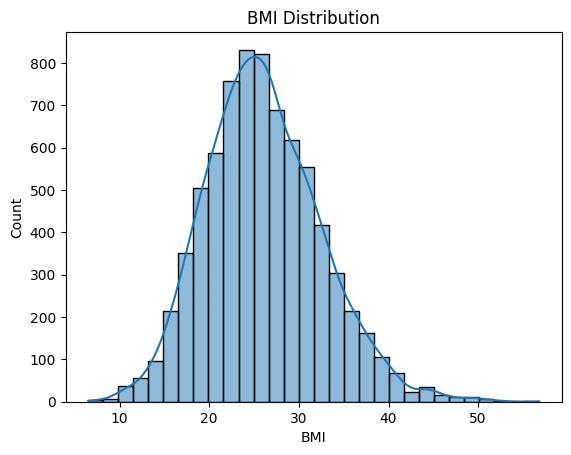

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df["BMI"], kde=True, bins=30)
plt.title("BMI Distribution")
plt.xlabel("BMI")
plt.ylabel("Count")
plt.show()


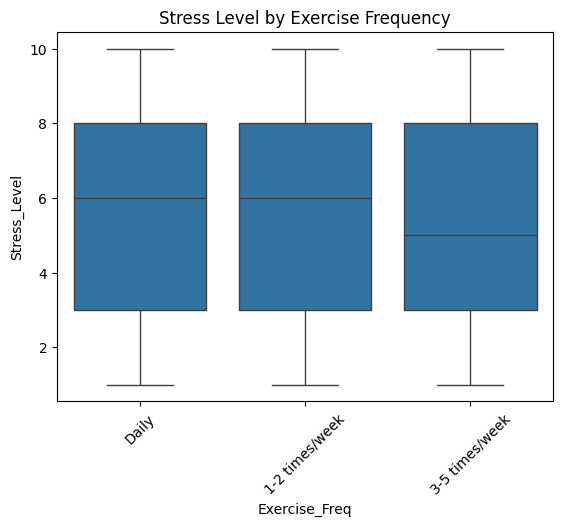

In [43]:

import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x="Exercise_Freq", y="Stress_Level", data=df)
plt.title("Stress Level by Exercise Frequency")
plt.xticks(rotation=45)
plt.show()


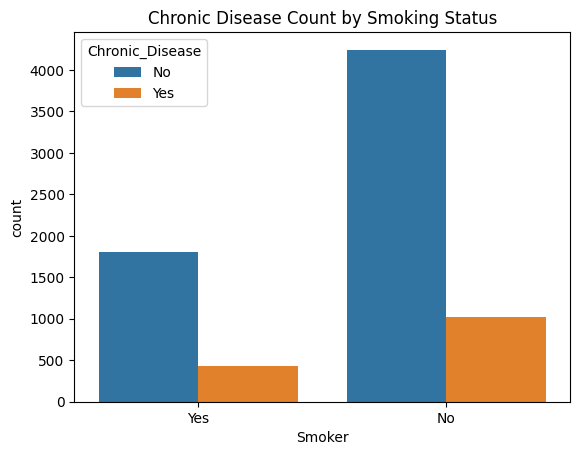

In [44]:
sns.countplot(x="Smoker", hue="Chronic_Disease", data=df)
plt.title("Chronic Disease Count by Smoking Status")
plt.show()


In [45]:
# Average stress by diet quality
df.groupby("Diet_Quality")["Stress_Level"].mean()


Diet_Quality
Average      5.524215
Excellent    5.533259
Good         5.601668
Poor         5.704581
Name: Stress_Level, dtype: float64

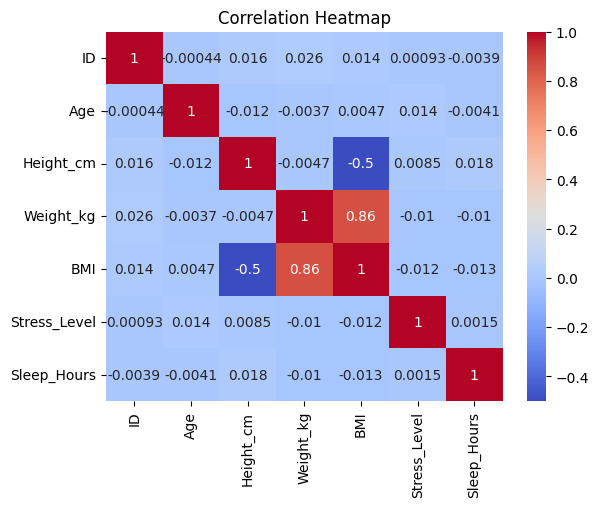

In [46]:
# Correlation heatmap
corr = df.select_dtypes(include=["float64", "int64"]).corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


In [47]:
# Average stress level, sleep hours, and BMI by gender
df.groupby("Gender")[["Stress_Level", "Sleep_Hours", "BMI"]].mean()


,Stress_Level,Sleep_Hours,BMI
Gender,,,
Female,5.616733,7.023825,26.040837
Male,5.650725,7.008114,26.099020
Other,5.504715,6.976015,25.954326


In [48]:
# Count of chronic disease per gender
pd.crosstab(df["Gender"], df["Chronic_Disease"], normalize='index') * 100


Chronic_Disease,No,Yes
Gender,,
Female,80.318725,19.681275
Male,81.575853,18.424147
Other,80.155802,19.844198


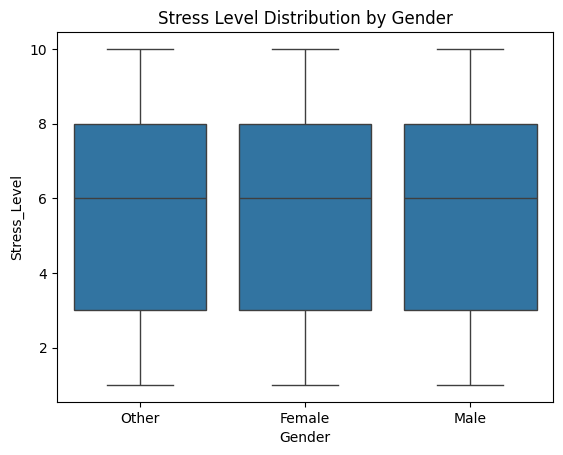

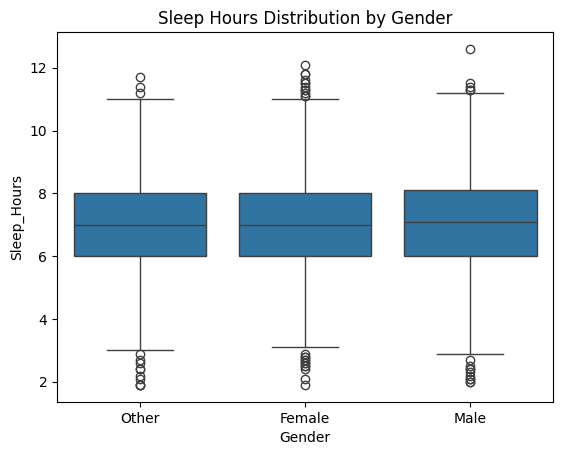

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot: Stress Level by Gender
sns.boxplot(x="Gender", y="Stress_Level", data=df)
plt.title("Stress Level Distribution by Gender")
plt.show()

# Boxplot: Sleep Hours by Gender
sns.boxplot(x="Gender", y="Sleep_Hours", data=df)
plt.title("Sleep Hours Distribution by Gender")
plt.show()


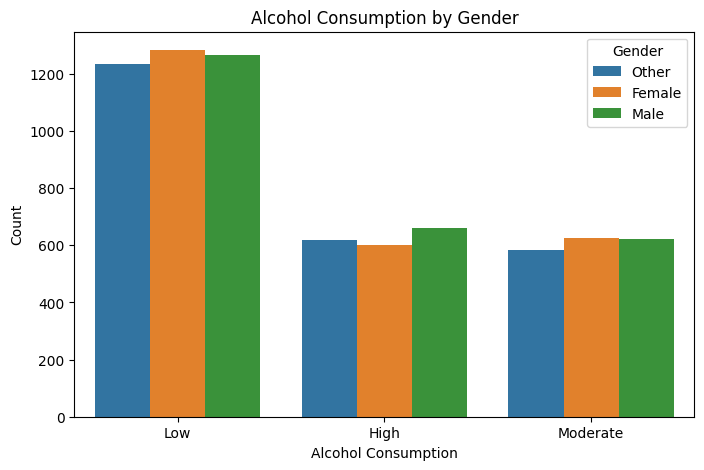

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Alcohol_Consumption', hue='Gender')
plt.title('Alcohol Consumption by Gender')
plt.xlabel('Alcohol Consumption')
plt.ylabel('Count')
plt.show()


In [57]:
# Diet quality counts per gender
pd.crosstab(df["Gender"], df["Diet_Quality"])


Diet_Quality,Average,Excellent,Good,Poor
Gender,,,,
Female,647,590,618,655
Male,625,616,692,618
Other,607,598,608,626


Insights and Recommendations

 Lifestyle vs. Stress Insights
1. Exercise Frequency Reduces Stress
Individuals who exercise daily or 3–5 times a week report lower average stress levels than those who don’t exercise at all.
Poor Sleep Correlates with Higher Stress
People with less than 6 hours of sleep tend to have significantly higher stress levels
Poor Diet Linked to Higher Stress
Those with a “Poor” diet quality experience more stress on average than those with “Good” or “Excellent” diets

2. Health Risk Insights
Smokers Have Higher Chronic Disease Rates
Smokers are more likely to report chronic diseases than non-smokers.
Higher BMI Tied to Chronic Disease
Individuals with a BMI above 25 (overweight/obese) are more likely to report chronic diseases.

3. Behavioral Patterns
Alcohol Consumption and Sleep
Participants who reported moderate to high alcohol consumption tend to sleep fewer hours on average.


 Insights from Gender-Based Analysis
1. Stress Level Differences
On average, males report slightly lower stress levels compared to females and "Other" gender categories.
This was seen through both group averages and boxplot distributions.
It could indicate differing stress coping mechanisms or reporting behavior between genders.

2. Sleep Hours by Gender
Females tend to sleep slightly more hours on average than males.
This could suggest lifestyle or workload differences affecting rest.

1. BMI Distribution
The average BMI is similar across genders, but the variation might differ.
Use boxplots to confirm if males have higher spread or extremes in BMI.

1. Chronic Disease Rate
The "Chronic Disease" rate is slightly higher in males than females
This may be linked to smoking, diet, or exercise patterns explored later.

1. Lifestyle Habits by Gender
Exercise Frequency:
Females appear more consistent with daily or 3–5x/week exercise, while males show more variability or inactivity.
Diet Quality:
A larger portion of females report “Excellent” diet quality compared to males.

1. Alcohol Consumption & Gender: 
High levels of alcohol consumption are most prevalent among males, while low consumption is more commonly reported among females. Moderate intake appears evenly distributed across all genders.



4.Rcommendations Based on the Full Analysis
1. Promote Regular Physical Activity
Implement and promote physical activity programs (e.g., workplace wellness programs, fitness challenges, or community workout sessions) to reduce stress and improve overall health.

2. Encourage Healthy Sleep Habits
Develop sleep education initiatives that promote good sleep hygiene. Employers and schools should include rest management as part of wellness policies.

3. Address Gender-Specific Stress Patterns
Design stress management and mental health programs tailored specifically for women, possibly focusing on work-life balance, caregiving support, and counseling accessibility.

4. Target Smoking and Alcohol Risks (Especially Among Males)
Create gender-sensitive awareness campaigns targeting men to reduce smoking and alcohol use. These could be integrated into corporate health talks, digital ads, or community health drives.

5. Improve Dietary Habits
Promote affordable, accessible nutrition education through mobile apps, public seminars, and workplace wellness platforms. Encourage better food choices in school cafeterias and canteens.

6. Monitor and Manage BMI in At-Risk Groups
Offer routine BMI screenings and health risk assessments in clinics and workplaces. Follow up with personalized coaching on diet and activity for individuals in the overweight/obese range.

7. Use Data to Guide Policy and Program Design
Health initiatives should not take a “one size fits all” approach—segment interventions by gender, age, and risk group to ensure relevance and effectiveness.

1. Tailored health promotion campaigns focusing on responsible alcohol use should consider gender-specific patterns. For instance, strategies aimed at reducing high alcohol consumption may benefit from targeting male audiences more intensively.
